# Effets aléatoires
Bien souvent, des variables explicatives discrètes contiennent de nombreuses catégories possibles, et nous sommes plus intéressés par la variabilité entre les catégories que par la moyenne par catégorie.

## Entre les moyennes ou la variance, il faut choisir.
Sans effet aléatoire, une variable discrète est modélisée en tant qu'effet fixe comme dans une ANOVA. Pour une variable avec $n_c=10$ catégories $(I$, $II$, $III$, $\dots$, $X)$, nous aurions :
$$y_i= \{ a_I,~a_{II},~a_{III},~a_{\dots},~a_{X} \}_i + \circ\circ\circ + e_i$$
où les coefficients $a_{\bullet}$ correspondent à la moyenne de leurs groupes, et $\circ\circ\circ$ aux éventuelles autres variables explicatives.

Lorsque nous sommes intéressés par la variance entre les catégories, **le problème** avec cette approche est que la variance des $\widehat{a_{\bullet}}$ estimés ($\widehat{~~~}$) n'est pas égale à la variance entre les catégories dans la population : 

$Var(\widehat{a_{\bullet}}) \neq Var(a_{\bullet})$ où les $a_{\bullet}$ sont inconnus car ils correspondent à la moyenne de la catégorie '$\bullet$' dans la *population*, et les $\widehat{a_{\bullet}}$ correspondent aux estimation de ces valeurs via l'échantillon. </br>

Ce problème a lieu malgré le fait que l'on utilise l'estimateur non biaisé de la population : $Var(\widehat{a_{\bullet}})= \frac{\sum_{c=1}^{n_c}(a_c-\widehat{\mu_c})^2}{n_c-1}$

**Ce problème vient du fait que**
<span style="color:red"> 
$$\widehat{a_{\bullet}}=a_{\bullet}+e_{ech}~~~;~~~~\textnormal{avec} ~~ e_{ech}\sim N(0,\frac{\sigma_e^2}{n_\bullet})$$
</span>
où $e_{ech}$ correspond à l'erreur d'estimation de $a_{\bullet}$ par $\widehat{a_{\bullet}}$, du fait de l'effet d'échantillonnage.

Cet effet d'échantillonnage est d'autant plus grand que la variance résiduelle $\sigma_e^2$ est grande, et que $n_\bullet$ le nombre d'observations dans la catégorie $\bullet$ est petit. 

Ce problème est résumé par la figure ci-dessous :

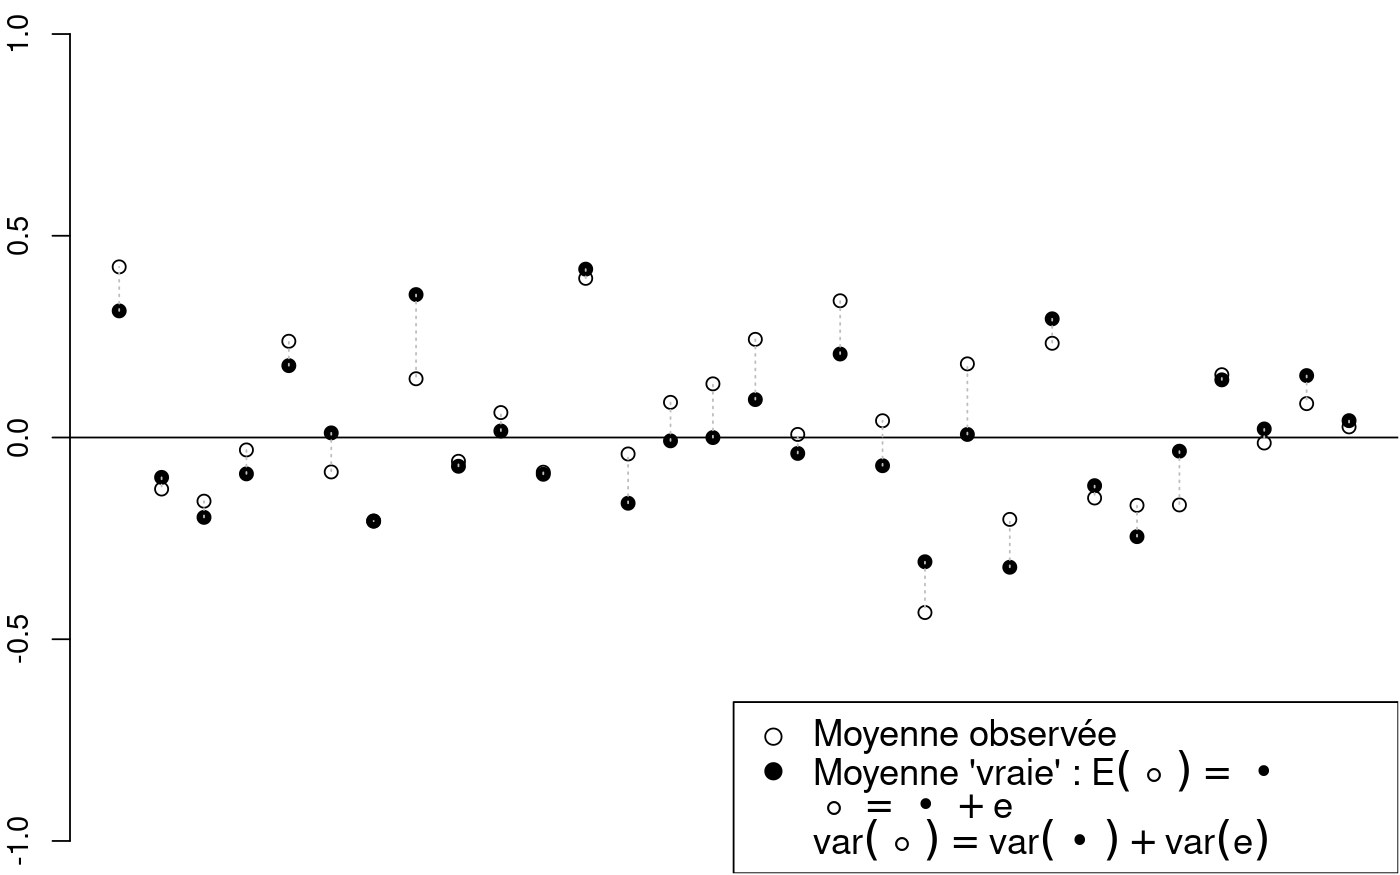

In [29]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 175)
source("./VisualExplanation - random effects.R")

$\widehat{a_{\bullet}}$ est bien un estimateur non biaisé de $a_{\bullet}$, puisque l'erreur d'estimation $e_{ech}$ est centrée sur zéro, et l'on a donc bien $E\left(\widehat{a_{\bullet}}\right)=a_{\bullet}$. </br>
Cependant, $Var(\widehat{a_{\bullet}})=Var(a_{\bullet}+e_{ech}) \neq Var(a_{\bullet})$. </br>

Il existe donc des méthodes dites de 'shrinkage', qui vont modifier les $\widehat{a_{\bullet}}$, en les décalant vers $0$ pour que l'espérance de leur variance corresponde à la variance réelle dans la population :
$$E\left(Var(\widehat{a_{\bullet}}^*)\right)=Var(a_{\bullet})$$
Cependant, si ceci permet bien d'obtenir une estimation non biaisée de la variance entre les catégories, ceci est fait au prix d'un 'shrinkage' qui conduit à biaiser les $\widehat{a_{\bullet}}$ vers $0$. Ce qui conduit à ce que les $\widehat{a_{\bullet}}^*$ soient des estimateurs biaisés des $a_{\bullet}$.

*C'est le grand drame des statistiques inférentielles :* </br>
On doit choisir entre utiliser l'échantillon pour inférer, par des 'effets fixes', les **moyennes des groupes** (et avoir une variance entre groupes biaisée) ou inférer, par des 'effets aléatoires', la **variance entre groupes** (et avoir des moyennes des groupes biaisées vers $0$).

Il n'est pas possible de produire une seule et même méthode pour estimer, de façon non biaisée, à la fois la moyenne et la variance.

## Formalisme
Les modèles avec à la fois des effets fixes et aléatoires sont appelés des modèles mixtes.
Traditionnellement, lorsqu'on les écrit mathématiquement (ou informatiquement), on met d'abords les effets fixes puis les effets aléatoires (cela colle à ce que fait l'algorithme de calcul des coefficients fixes et aléatoires) :
$$y_i= \circ\circ\circ + \{ a_I,~a_{II},~a_{III},~a_{\dots},~a_{X} \}_i + e_i~~;~~ e_i\sim N(0,\sigma_e^2)$$
Ce qui est souvent noté 
$$y_i= \circ\circ\circ + A_\bullet + e_i~~~~\textnormal{avec}~~~ A_\bullet\sim N(0,\sigma_\bullet^2) ~~\textnormal{et}~~~ e_i\sim N(0,\sigma_e^2)$$
où les $\circ\circ\circ$ correspondent aux autres effets, fixes ou aléatoires, du modèle et $\sigma_\bullet^2$ à la variance entre les catégories '$\bullet$' de l'effet aléatoire.

On peut noter que par convention, on note les effets fixes avec une minuscule et souvent les effets aléatoires avec une majuscule, d'où le $A_\bullet$.

Une autre façon de décrire les modèles mixtes est 
> $A_\bullet \sim N(0,\sigma_\bullet^2)$
> 
> $\widehat{y_i} = \circ\circ\circ + A_\bullet$
> 
> $y_i \sim N(\widehat{y_i},\sigma_e^2)$

## Hypothèses
*En plus des hypothèses des modèles classiques*, les hypothèses des modèles mixtes sont
* Les effets des catégories d'une variable décrite par un effet aléatoire sont supposés provenir d'une seule et même distribution. Cette hypothèse est par exemple non respectée si on l'applique un effet aléatoire sur le succès de différents médecins qui viennent de différentes écoles de médecine, sans prendre en compte la variable 'école de médecine'.
* Cette distribution est le plus souvent supposée être une loi normale, ce qui est signifié par $A_\bullet\sim N(0,\sigma_\bullet^2)$. Cette hypothèse est rarement vérifiée, et ce n'est pas bien, (voir cet article : [1](https://bmcmedicine.biomedcentral.com/articles/10.1186/s12916-023-02823-9)).
* 'exchangeability' : Les catégories doivent être **inter-changeables**. Les catégories de la variable qui sont présentes dans les données proviennent d'une population plus grande de catégories. Les catégories présentent dans les données doivent être représentatives de l'ensemble, et donc interchangeable : les résultats ne devraient pas être très différents si les catégories étudiées avaient été différentes.

Si vous les avez comprises, vous aurez noté que ces 3 points sont quasi-identiques et se reportent tous au premier point **"les catégories proviennent d'une seule et même distribution, généralement une loi normale"**

## Dois-je utiliser un effet fixe ou effet aléatoire ?
Si les catégories d'une variable sont un échantillon d'un ensemble plus grand de catégories, on étudie ces catégories, mais on aurait tout aussi bien pu en étudier d'autre, alors un effet aléatoire est plus adapté pour cette variable.

Si les catégories d'une variable ne sont pas librement échangeables avec d'autres catégories sans que cela ne change l'interprétation des résultats, alors un effet fixe est plus adapté pour cette variable.

Ainsi, 3 questions peuvent guider le choix de considérer un facteur fixe ou aléatoire i) 
les catégories ont-elles un intéret pour elles-même, où ont-elles été choisit au hazard ? ii) Les conclusions concerneront-elles uniquement les catégories étudiée ou un ensemble plus grand de catégories ? et iii) si l'expérimentation devait être refaite, les
catégories étudiées seraient-elles les mêmes ou d'autres seraient tirées dans un plus grand ensemble de catégories ? 

**Exemples** (les variables explicatives sont <u>soulignées</u>, et les variables expliquées sont en *italique*) :

|Effet **fixe**|Effet **aléatoire**|
--- | --- |
|*L'efficacité* de <u>différentes molécules médicamenteuses</u> sont comparées | |
||On compare l'*efficacité* de <u>différents psychologues</u> pour traiter des patients victimes de stress pré-traumatiques liés aux cataclysmes climatiques en cours et à venir.|
|On compare l'*efficacité* de <u>différents [jeux sérieux](https://fr.wikipedia.org/wiki/Jeu_s%C3%A9rieux) </u>visant à sensibiliser au dérèglement climatique||
||On étudie la variabilité du *taux de rémission* pour une maladie donnée entre <u>différents hôpitaux</u>|
|On étudie la variabilité du *taux de rémission* en fonction de <u>3 approches thérapeutiques</u>|la variable '<u>hôpital</u>' reste ici en effet aléatoire|

Un autre paramètre à prendre en compte pour choisir entre effet fixe et aléatoire, c'est le nombre de catégories présente dans les données. Par exemple, si l'on compare l'*efficacité* de <u>différents psychologues</u> en étudiant seulement 4 psychologues, on n'aura pas assez de psychologues pour estimer de façon précise la variabilité entre psychologues *dans la population*. **En pratique, on considère souvent qu'il faut au moins 5 catégories par variable pour pouvoir l'utiliser en tant qu'effet aléatoire**.

Le plus souvent, les effets aléatoires correspondent à des variables qui ne sont pas celles qui nous intéressent, mais qui induisent de la variabilité dans la variable expliquée. Afin de prendre en compte cette variabilité, on met ces variables en effet aléatoires. </br>
Par exemple, si l'on étudie 2 approches thérapeutiques (effet fixe), et que, pour chaque approche, on a 3 psychologues qui chacun suivent 10 patients, les patients suivis par un même psychologue sont moins indépendants que des patients suivis par différents psychologues. Pour comparer statistiquement les deux approches thérapeutiques, il est *indispensable* de prendre en compte la variabilité induite par les différences entre psychologue (sans quoi la variable 'psychologue' pourrait agir comme une variable confondante).
À cette fin, on pourra utiliser le modèle suivant :

$$y_i= \{ a_I,~a_{II}\}_i + Psy_\bullet + e_i~~~~;~~~ Psy_\bullet\sim N(0,\sigma_\bullet^2)$$

L'effet des deux approches thérapeutiques est décrit par les coefficients $\{a_I,~a_{II}\}$, et la variabilité induite par les différences entre psychologues, *autres que l'approche thérapeutique qu'illes utilisent*, est prise en compte par l'effet aléatoire 'psychologue'.

### Il y a une différence fondamentale entre les effets fixes et aléatoires. 
* Les coefficients des **effets fixes** sont supposés être non aléatoires, ils ont une valeur précise dans la population et on estime cette valeur par un échantillon. 
* Les coefficients des effets aléatoires sont supposés être des réalisations d'une loi de probabilité (classiquement une loi normale). C'est ce qui est signifié par le $A_\bullet\sim N(0,\sigma_\bullet^2)$.

Ainsi, la décomposition de la variance pour un effet fixe et aléatoire est : </br>
**Effet fixe** :

![](./Figures/Decompositiondelavariance_effetfixe.png)

**Effet aléatoire** :

![](./Figures/Decompositiondelavariance_effetaleatoire.png)


On peut voir sur le graphique du haut à droite, que les effets fixes supposent que pour chaque catégorie de la variable, il y a une valeur fixe qui y correspond dans la population. À l'inverse, on peut voir (graphique du bas) que les effets aléatoires supposent que chaque catégorie de la variable est une réalisation d'une loi de probabilité qui décrit l'ensemble des catégories de la population.

Cette différence prend tout son sens quand on considère les **effets aléatoires sur la pente**. Ceux-ci sont décrits ci-après.

<span style="color:darkgreen"> **Jusqu'ici**</span>, nous avons uniquement considéré les *effets aléatoires sur l'ordonnée à l'origine* : pour chaque catégorie de la variable, une valeur est ajoutée à l'ordonnée à l'origine (cette valeur pouvant être négative).

Ceci est illustré par ce graphique :

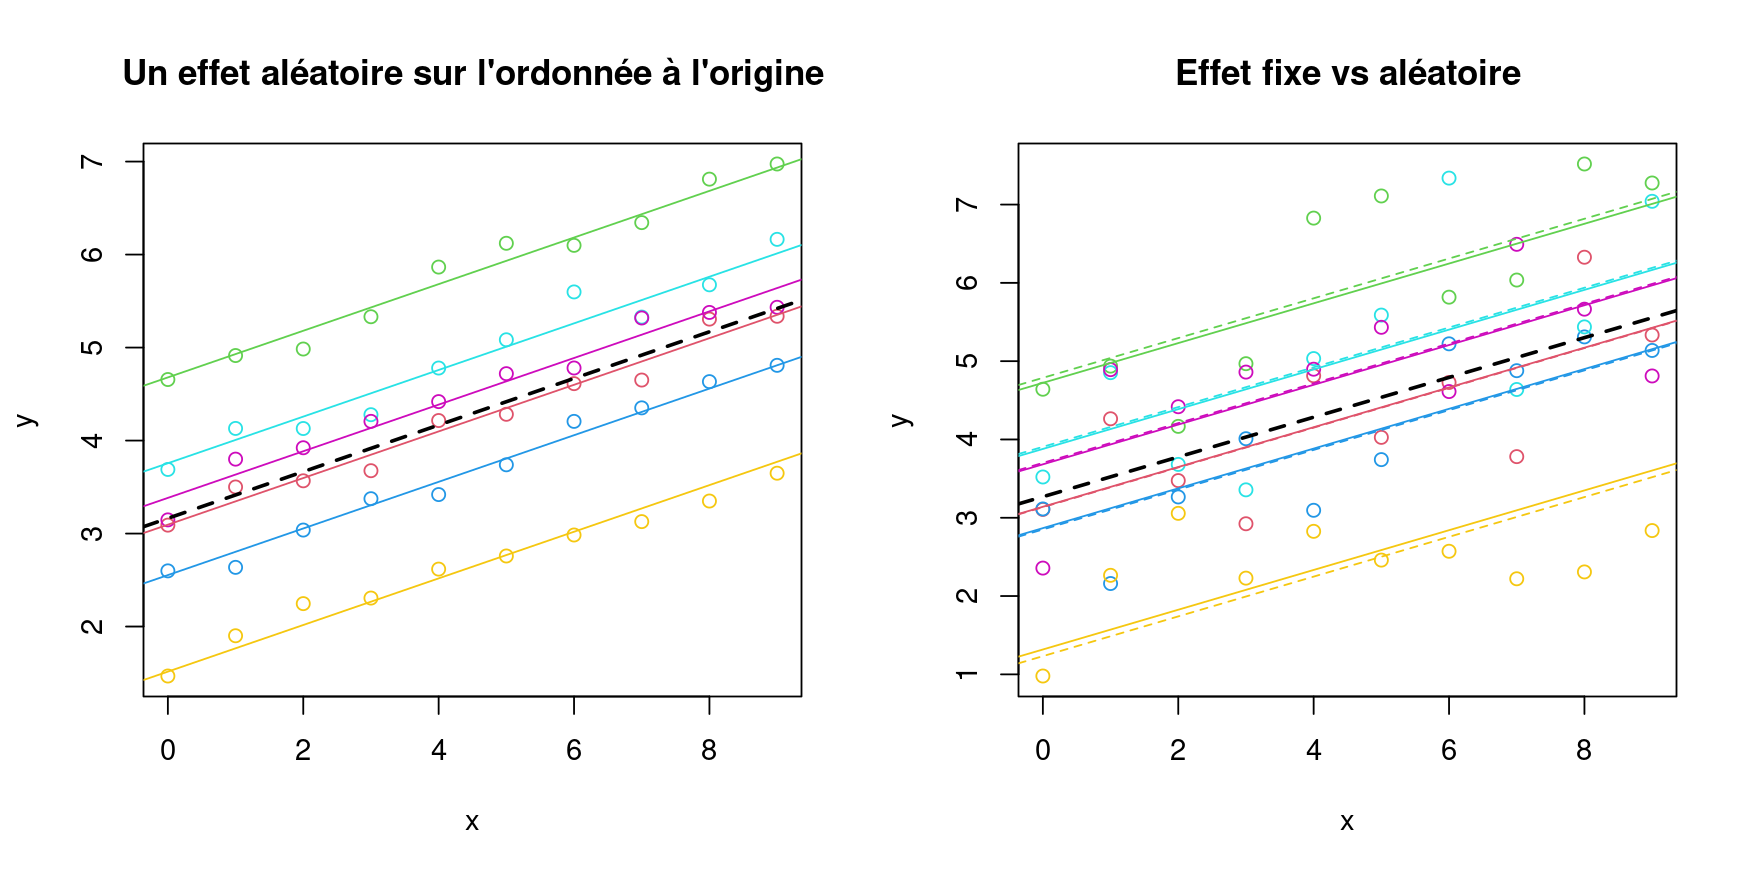

In [1]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 175)
source('./Figures/PlotRandomEffects - Intercept.R')

**Graphique de gauche** </br>
La partie en pointillés noir représente la part fixe du modèle, la pente et l'intercept qui sont commune à tous les groupes, et le reste la part liée aux effets alétoires. La pente est la même pour tous les groupes, seule l'ordonnée à l'origine change car on a utilisé un effet aléatoire sur l'ordonnée à l'origine.

**Graphique de droite**</br>
Même chose que sur le graphique de droite, mais en plus, on a rajouté en pointillé ce que l'on aurait obtenu avec un effet fixe. Et pour augmenter la différence entre effet fixe et aléatoire, on a augmenté la variance résiduelle (car c'est celle-ci est importante que les effets fixes et aléatoires se comporte différement).

Question : Sur ce graphique quelle différence peut-on noté entre effet fixe et effet aléatoire ?
<!----

---->

Réponse : </br>
$>>>$ <span style="color:red"> ?</span> $<<<$
> Les effets aléatoires sont plus proches de la moyenne que les effets fixes.

<span style="color:darkgreen">**Cependant, on utilise aussi parfois**</span> des *effets aléatoires sur la pente* : pour chaque catégorie de la variable, une valeur est ajoutée à la pente (cette valeur pouvant être négative). </br>
Ce type d'effet peut aussi s'interpréter comme une interaction entre la variable dont à calcul la pente, et la variable utilisée en effet aléatoire.

En règle générale quand on a un effet aléatoire sur la pente on utilise aussi un effet aléatoire sur l'intercept. Mais, pour simplifié j'ai illustré ci-dessous un effet aléatoire uniquement sur la pente :

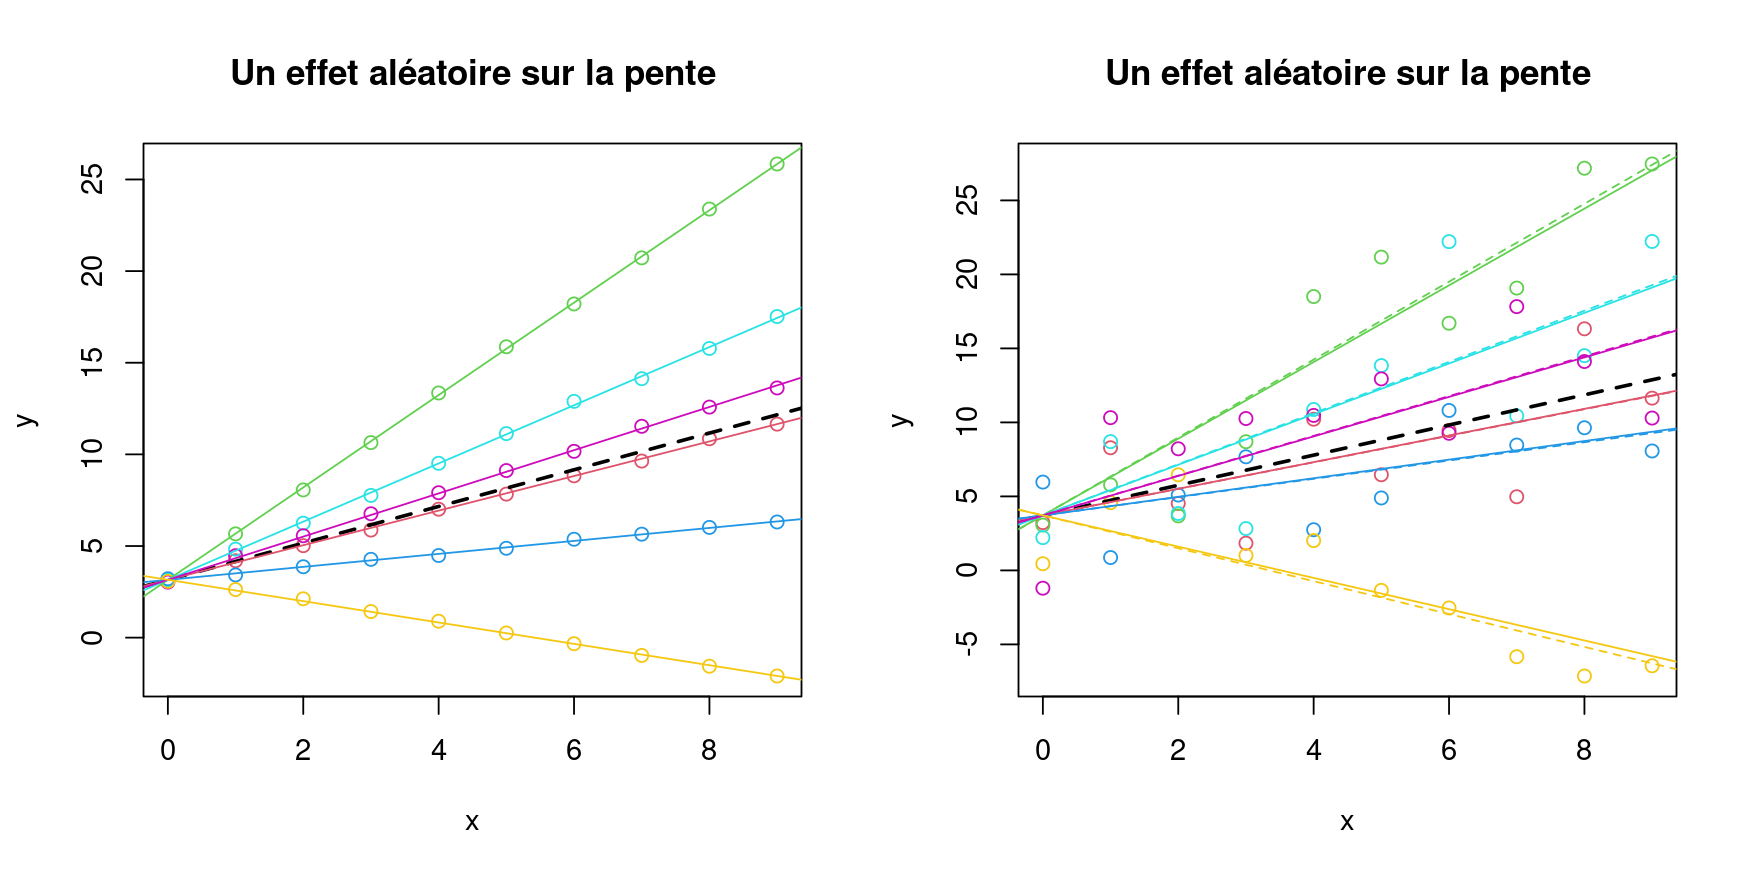

In [2]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 175)
source('./Figures/PlotRandomEffects - Slopes.R') 

**Graphique de gauche** </br>
La partie en pointillés noir représente la part fixe du modèle, la pente et l'intercept qui sont commune à tous les groupes, et le reste la part liée aux effets alétoires. L'intercepte est le même pour tous les groupes, seule la pente change car on a utilisé un effet aléatoire seulement sur la pente.

**Graphique de droite**</br>
Même chose que sur le graphique de droite, mais en plus, on a rajouté en pointillé ce que l'on aurait obtenu avec, à la place de l'effet aléatoire, en effet fixe, une intéraction entre la variable continue et catégorielle. <span style="color:gray"> Et pour augmenter la différence entre effet fixe et aléatoire, on a augmenté la variance résiduelle (car c'est celle-ci est importante que les effets fixes et aléatoires se comporte différemment).
<span> 

On peut voir que, par rapport au modèle à effet fixe, l'ensemble des pentes est biaisé vers la pente moyenne. En effet, l'effet aléatoire consiste à biaiser vers $0$ la part que l'on ajoute à la pente moyenne de l'ensemble des groupes. Cela revient à emprunter de l'information aux autres catégories pour estimer les paramètre de la distribution dont l'ensemble des catégories sont issues pour en retour, estimer la valeur de chaque catégorie. C'est ce que l'on appelle le [partial pooling](https://khakieconomics.github.io/2016/11/09/Random-effects,-partial-pooling,-and-exchangability.html).

Pour plus de détails sur la différence entre effet fixe et aléatoire, voir par exemple : [1](https://stats.stackexchange.com/questions/26230/what-is-the-mathematical-difference-between-random-and-fixed-effects).

## Effets aléatoires pour structures de dépendance complexe

### Les effets nichés
Pour rester sur l'exemple de nos 6 psychologues qui utilisent l'approche thérapeutique I ou II, chacun pour traiter 10 patients victimes de stress pré-traumatiques liés aux cataclysmes climatiques en cours et à venir. 

Imaginons maintenant que chaque groupe de 10 patients soit en fait constitué de 5 couples. Il est évident que les membres d'un même couple vont s'influencer mutuellement, soit vers l'écoanxiété, soit vers l'[éco-rassurisme](https://www.radiofrance.fr/franceinter/podcasts/histoires-economiques/histoires-economiques-du-jeudi-26-mai-2022-4469704). On a donc 2 types de non-indépendance dans les données, être traité par le même psychologue, et appartenir au même couple. On peut voir que les effets sont [niché](https://stats.stackexchange.com/questions/372257/how-do-you-deal-with-nested-variables-in-a-regression-model), car tous les individus qui appartiennent au même couple sont aussi traités par le même psychologue. La réciproque n'est pas vraie, on a donc l'effet `couple` qui est niché dans l'effet `psychologue`.

Cette structure hiérarchique **doit** être spécifiée au modèle, et ce que l'on utilise des effets fixes ou aléatoires. (Cependant, elle est plus fréquente pour des effets aléatoires que des effets fixes.)
Cette spécification au modèle est importante, car l'effet d'appartenir à un couple donné (ou la particularité couple donné) ne peut être étudié dans l'absolu, mais seulement par rapport au psychologue qui traite ce couple. 

Pour plus de détail, voir ces liens : [1](https://uoftcoders.github.io/rcourse/lec08-linear-mixed-effects-models.html#deeply_nested_and_crossed_effects) et [2](https://stats.stackexchange.com/questions/372257/how-do-you-deal-with-nested-variables-in-a-regression-model)

### Prendre en compte un continuum hiérarchique (et des variables cachées inconnues).
Dans la section précédente, nous avons décrit une structure hiérarchique **<u>discrète</u>** de dépendance entre les observations : 2 observations provenant d'un même couple sont plus liées que 2 observations provenant de 2 couples différents, mais d'un même psychologue, qui sont, elles-mêmes, plus liées que 2 observations provenant de 2 psychologues différents.

Bien souvent, on n'a pas une structure discrète de dépendance entre les observations, mais une structure de dépendance **<u>continue</u>** : </br>
**Exemple 1 : les bébés sans bras**, [ni chocolat](https://fr.wikipedia.org/wiki/Pas_de_bras,_pas_de_chocolat_!) </br>
La géographie </br>
Un bel exemple de l'importance de comprendre les statistiques ! : un [article du Monde](https://www.reddit.com/r/france/comments/9oq5n5/enfants_sans_bras_les_mauvais_calculs_de_sant%C3%A9/), et un article de la [REMERA](https://archive.wikiwix.com/cache/index2.php?url=https%3A%2F%2Fwww.remera.fr%2Fwp-content%2Fuploads%2F2018%2F09%2FAGREGATS.pdf%2Findex.html#federation=archive.wikiwix.com&tab=url) </br>
Ici, la question statistique est de savoir s'il y a un agrégat géographique de bébés sans bras. S'il n'y a pas d'agrégat, on peut imaginer qu'il s'agisse de mutations aléatoires (pas de chance, pas de chocolat $-$ ni de bras). Et, qu'il s'agisse de mutation ou non, sans agrégat, on n'a pas de début de piste pour chercher une cause. À l'inverse, si l'on a un agrégat, on peut chercher quelles sont les variables qui co-varient avec la fréquence de bébés sans bras. </br>
*Dans une analyse statistique spatiale, il y a **toujours** une possibilité pour qu'une variable* inconnue *varie dans l'espace, comme nos variables d'intérêts, et impacte notre variable expliquée. On ne peut pas prendre en compte simplement cette variable, puisqu'elle est inconnue. Et il y a un risque pour qu'elle induise une corrélation entre nos variables d'intérêts et la variable expliquée : un effet confondant. Afin d'éviter cela, il faut spécifier aux modèles que les observations proches dans l'espace ne sont pas indépendantes. En effet, les observations proches dans l'espace risquent d'être impactées de façon similaire par des variables inconnues qui, elles aussi, varient dans l'espace. Pour spécifier ce type de dépendance dans les données, on utilise un effet aléatoire avec une catégorie différente par observation ([OLRE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5590716/#S19title)), et on contraint la [matrice de co-variance](https://en.wikipedia.org/wiki/Covariance_matrix) entre ces catégories à être proportionnelle à la distance géographique.* Pour plus de détail sur les analyses spatiales, voir *par exemple* : [1](https://arxiv.org/pdf/2212.10976.pdf) et [2](https://link.springer.com/article/10.1007/s43071-022-00024-9)  </br>
**Exemple 2 : les bébés sans bras (bis)** </br>
La génétique </br>
Si la cause était génétique, sauf quelques cas particuliers, elles devraient laisser une trace dans la généalogie : l'absence de bras devrait être en tout ou partie héréditaire. Donc comme dans l'**Exemple 1**, on a une cause inconnue, une ou plusieurs mutations, qui co-varient dans la généalogie, tout comme l'absence de bras. Ceci illustre que deux individus ne sont pas non plus indépendants s'ils sont génétiquement apparentés. Pour plus de détails, voir : [1](https://devillemereuil.legtux.org/new-version-of-the-tutorial-on-heritability-and-mcmcglmm/)</br>

## Effets aléatoires `==` Variable latente
On peut donc voir que les effets aléatoires permettent de prendre en compte des variables inconnues, via d'autres variables qui doivent co-varier avec ces variables inconnues (la génétique, l'espace, l'identité des couples ou des psychiatres, pour reprendre les exemples précédents).

Les *effets aléatoires* et les *variables latentes* sont en fait les deux faces d'une même pièce qui est insérée dans les modèles statistiques pour prendre en compte l'effet de variables ni mesurées, ni connues, mais qui affectent le système étudié (i.e.: des variables cachées ; liens [1](https://m-clark.github.io/docs/mixedModels/growth_vs_mixed_old.html), [2](https://doi.org/10.1177/0962280220921889), [3](https://z-lib.io/book/15953507). Le terme 'variable latente' est plutôt utilisé dans le cadre des analyses de réseaux et de causalité, et il fait référence aux effets de la variable cachée qui seront inférés par le modèle. Le terme 'effet aléatoire' est plutôt utilisé dans le cadre des modèles mixtes et il fait référence aux contraintes imposées à la variable latente pour que le modèle en estime les valeurs, qui correspondent aux effets de la variable cachée.

## OLRE comme remède à la surdispersion
Le problème de la surdispersion vient du fait que i) des variables que l'on ne connait pas impactent la variable expliqué, ce qui y rajoute de la variance, et ii) on utilise des modèles basé ur des distributions qui supposent un quantité stricte de variance.

Une stratégie courament utilisée pour palier la surdispersion dans les modèles Poisson ou Binomiaux est donc d'ajouter un effet aléatoire avec une catégorie pour chaque observation. Ceci permet "d'absorber" la variance sur-numéraire.

Pour plus de détail, voir [1](https://peerj.com/articles/616/) et [2](https://peerj.com/articles/1114/).

Cette approche est celle qui est utilisée par défault par le package R `MCMCglmm` qui implémente des GLMM dans le cadre Baysien. Comme indiqué dans ses ['course note'](http://cran.nexr.com/web/packages/MCMCglmm/vignettes/CourseNotes.pdf#subsection.2.3.2) :
> I believe that a model assuming all relevant variables have been measured or controlled for, should **not** be the *de facto* model, and so when you specify `family=poisson` in `MCMCglmm`, over-dispersion is always dealt with.

## REML [restricted (or residual, or reduced) maximum likelihood]
Les modèles mixtes ne sont souvent pas estimés par maximum de vraisemblance (maximum likelihood ; ML), mais par maximum de vraisemblance restrainte (REML).

Il s'agit d'une forme particulière d'estimation du maximum de vraisemblance qui ne fonde pas les estimations sur un ajustement du maximum de vraisemblance à toutes les informations, mais utilise plutôt une fonction de vraisemblance calculée à partir d'un ensemble de données transformées. Pour plus de détail, voir par exemple ce [lien](https://stats.stackexchange.com/questions/48671/what-is-restricted-maximum-likelihood-and-when-should-it-be-used).

Cette approche induit une complication lors de l'utilisation du test du ratio de vraisemblance : </br>
Ce test peut être utilisé, soit pour tester un effet fixe, soit pour tester un effet aléatoire.

Le test du ratio de vraisemblance appliqué à un modèle ajusté par REML nécessite exactement la même spécification des effets fixes dans les deux modèles. Par conséquent, pour comparer des modèles avec différents effets fixes (un scénario courant) avec un test ratio de vraisemblance, il faut utiliser ML.

En résumé, test d'un :

||Effet fixe|Effet aléatoire|
|---|---|---|
|Les modèles doivent être ajustés par|ML|REML|


## Les degrès de libertés (degree of freedom; df)
Un effet aléatoire est supposé suivre une loi normale, et par construction, celle-ci est centrée sur $0$. Le modèle doit donc estimer un paramètre, la variance de cette distribution.
De ce point de vu, un seul paramètre est estimé. Cependant, on estime aussi, pour chaque catégorie, un 'intercept' (et parfois une pente). Mais ces valeurs que l'on estime sont contraintes par la distribution à laquelle elles appartiennent. La concéquence est que le nombre de degrés de liberté est très difficile à calculer.

Le nombre effectif de paramètres utilisés par un effet aléatoire se situe quelque part entre 1 (c'est-à-dire un seul paramètre, la variance de la distribution) et $n_c-1$ (c'est-à-dire un paramètre pour chaque catégorie *supplémentaire* de l'effet aléatoire).

En pratique, les logiciels varient énormément dans leur approche du calcul du df. Il y a des approximations très approximatives, et des approximations moins approximatives, à savoir les approximations de Satterthwaite et de Kenward-Roger (KR). Ces deux approches donnent des résultats généralement concordants, la méthode KR est parfois plus juste.

Pour aller plus loin sur les modèles mixtes : 
[Bolker et al 2008 Generalized linear mixed models- a practical guide for ecology and evolution](https://pages.stat.wisc.edu/~larget/Stat998/Fall2015/Bolker-et-al-2009-TREE.pdf)

> Prenez toujours soin de vos degrés de liberté, et peut-être plus encore, de ceux des autres !
